In [23]:
import json
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [24]:
# Pandas Options
pd.options.display.max_colwidth = 250

In [25]:
with open("./health_care_charity_data_json.json", "r+", encoding="utf-8") as f:
    data = json.load(f)

In [28]:
raw_df = pd.json_normalize(data, max_level=1)

In [29]:
df = pd.DataFrame(raw_df.drop_duplicates(subset="BN/Registration number"))

In [30]:
df.head()

,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,1.Ongoing Programs,...,3.Salary,3.Ongoing Programs,3.Revenue,3.Expenses,4.Total Compensation,4.Salary,4.Ongoing Programs,4.Revenue,4.Expenses,_id.$oid
0,858665102RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': '$273,971.00', 'Full-time employees': '6', 'Part-time employees': '5', 'Professional and consulting fees': '$5,173.00'}","{'$1 to $39,999': '5', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,"{'Legend': {'Receipted donations': '1,615.00 (0.45%)', 'Non-receipted donations': '313.00 (0.09%)', 'Gifts from other registered charities': '4,046.00 (1.12%)', 'Government funding': '350,865.00 (97.07%)', 'All other revenue': '4,609.00 (1.28%)'}...","{'Legend': {'Charitable programs': '264,111.00 (75.06%)', 'Management and administration': '87,760.00 (24.94%)', 'Fundraising': '0.00 (0.00%)', 'Gifts to other registered charities and qualified donees': '0.00 (0.00%)', 'Other': '0.00 (0.00%)'}, ...","{'Total compensation for all positions': '$250,703.00', 'Full-time employees': '5', 'Part-time employees': '9', 'Professional and consulting fees': '$5,697.00'}","{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,...,"{'$1 to $39,999': '3', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOffrir des services de maintien à domicile et un centre de jour aux personnes vivant avec le VIH/SIDA.\nOffrir de l'assistance médicale aux personnes vivant avec l'hépatite C en coinfection avec le VIH/SIDA.,"{'Legend': {'Receipted donations': '261.00 (0.07%)', 'Non-receipted donations': '24,773.00 (6.95%)', 'Gifts from other registered charities': '14,219.00 (3.99%)', 'Government funding': '306,830.00 (86.08%)', 'All other revenue': '10,363.00 (2.91%...","{'Legend': {'Charitable programs': '188,448.00 (68.23%)', 'Management and administration': '85,111.00 (30.81%)', 'Fundraising': '2,642.00 (0.96%)', 'Political activities': '0.00 (0.00%)', 'Gifts to other registered charities and qualified donees'...","{'Total compensation for all positions': '$223,845.00', 'Full-time employees': '4', 'Part-time employees': '6', 'Professional and consulting fees': '$4,165.00'}","{'$1 to $39,999': '3', '$40,000 to $79,999': '1'}","Ongoing programs: \n\t\n\tOffrir des services d'hébergement, de maintien à domicile et un centre de jour aux personnes vivant avec le VIH/SIDA. Offrir de l'assistance médicale aux personnes vivant avec l'hépatite C en coinfection avec le VIH/SIDA.","{'Legend': {'Receipted donations': '7,386.00 (2.32%)', 'Non-receipted donations': '13,014.00 (4.08%)', 'Gifts from other registered charities': '1,852.00 (0.58%)', 'Government funding': '289,757.00 (90.86%)', 'All other revenue': '6,904.00 (2.16%...","{'Legend': {'Charitable programs': '221,607.00 (71.94%)', 'Management and administration': '81,439.00 (26.44%)', 'Fundraising': '4,985.00 (1.62%)', 'Political activities': '0.00 (0.00%)', 'Gifts to other registered charities and qualified donees'...",634d4906e56974901eebc037
5,108035544RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': '$7,615,209.00', 'Full-time employees': '141', 'Part-time employees': '50', 'Professional and consulting fees': '$168,419.00'}","{'$40,000 to $79,999': '3', '$80,000 to $119,999': '6', '$120,000 to $159,999': '1'}","Ongoing programs: \n\t\n\t1. Mental Health Program: Provision of care

In [301]:
df.describe()

,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,1.Ongoing Programs,...,3.Salary,3.Ongoing Programs,3.Revenue,3.Expenses,4.Total Compensation,4.Salary,4.Ongoing Programs,4.Revenue,4.Expenses,_id.$oid
count,6150,6150,6150,6150,6150,6150,6150,6000,6000,6000,...,5679,5679,5679,5679,5534,5534,5534,5534,5534,6150
unique,6150,226,4402,748,5571,5728,5436,4293,716,5474,...,646,5176,5383,5084,4047,650,5003,5292,4997,6150
top,858665102RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31\n2017-03-31,"{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}",{},Ongoing programs:,{'Error Encountered': ' Revenue See the T3010 for financial information '},{'Error Encountered': ' Expenses See the T3010 for financial information '},"{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}",{},Ongoing programs:,...,{},Ongoing programs:,{'Error Encountered': ' Revenue See the T3010 for financial information '},{'Error Encountered': ' Expenses See the T3010 for financial information '},"{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}",{},Ongoing programs:,{'Error Encountered': ' Revenue See the T3010 for financial information '},{'Error Encountered': ' Expenses See the T3010 for financial information '},634d4906e56974901eebc037
freq,1,1875,1178,3211,566,389,695,1187,3090,520,...,2896,496,283,584,1079,2789,520,232,525,1


In [302]:
df.columns

Index(['BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid'],
      dtype='object')

## Salary Cleaning

In [31]:
def salary_dict_to_list(salary_dict):
    #print(salary_dict)
    salary_list = [0,0,0,0,0,0,0,0,0]
    if isinstance(salary_dict, dict):
        for key, value in salary_dict.items():
            if key == "$1 to $39,999":
                salary_list[0] = int(value)
            elif key == "$40,000 to $79,999":
                salary_list[1] = int(value)
            elif key == "$80,000 to $119,999":
                salary_list[2] = int(value)
            elif key == "$120,000 to $159,999":
                salary_list[3] = int(value)
            elif key == "$160,000 to $199,999":
                salary_list[4] = int(value)
            elif key == "$200,000 to $249,999":
                salary_list[5] = int(value)
            elif key == "$250,000 to $299,999":
                salary_list[6] = int(value)
            elif key == "$300,000 to $349,999":
                salary_list[7] = int(value)
            elif key == "$350,000 and over":
                salary_list[8] = int(value)
            else:
                print("Unknown Salary Bin")
    return salary_list

In [32]:
for i in range(5):
    salary_lists = []
    column_name = f"{str(i)}.Salary"
    for salary_dict in list(df[column_name]):
        salary_list = salary_dict_to_list(salary_dict)
        salary_lists.append(salary_list)
    new_column_name = f"{str(i)}.SalaryArray"
    df[new_column_name] = salary_lists

In [33]:
df.columns

Index(['BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray'],
      dtype='object')

### Plotting Salary Data

In [50]:
sum_list = [0,0,0,0,0,0,0,0,0]
for salary_list in salary_lists:
    for index, count in enumerate(salary_list):
        sum_list[index] += count

In [51]:
sum_list

[5835, 8694, 3859, 1226, 532, 397, 271, 140, 247]

In [52]:
sum(sum_list)

21201

In [53]:
sum(sum_list[5:]) / sum(sum_list) * 100

4.976180368850526

In [54]:
salary_sum_dict = {
    "salary_bin_counts": sum_list,
    "salary_bins": ["$1 to $39,999", "$40,000 to $79,999", "$80,000 to $119,999", "$120,000 to $159,999", "$160,000 to $199,999", "$200,000 to $249,999", "$250,000 to $299,999", "$300,000 to $349,999", "$350,000 and over"]
}

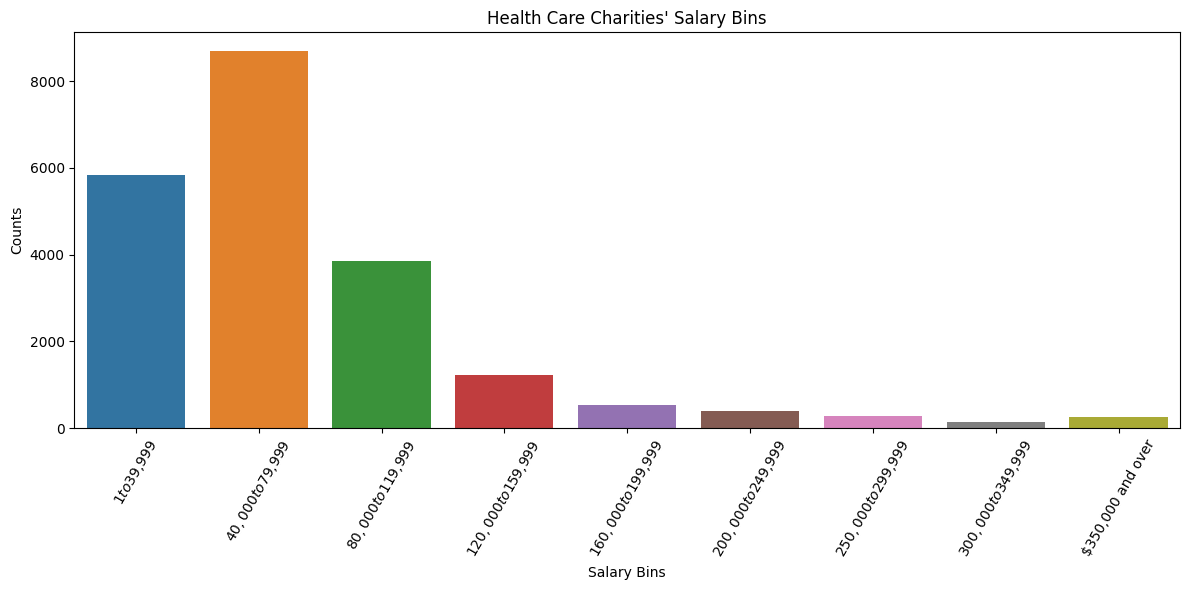

In [55]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(data=salary_sum_dict, x="salary_bins", y="salary_bin_counts")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.title("Health Care Charities' Salary Bins")
plt.xlabel("Salary Bins")
plt.ylabel("Counts")
plt.tight_layout()
plt.savefig("salary_bins_counts")
plt.show()

In [312]:
index_of_top_salaries = []
for salary_list in salary_lists:
    for i in range(1,10):
        if salary_list[-i] != 0:
            index_of_top_salaries.append(10-i)

In [313]:
Counter(index_of_top_salaries)

Counter({2: 1861,
         1: 1348,
         5: 251,
         4: 523,
         3: 1123,
         9: 74,
         6: 196,
         8: 78,
         7: 130})

## Total Compensation Cleaning

In [34]:
def is_float(floating):
    try:
        float(floating)
        return True
    except:
        return False
    
def normalize_money(floating_money):
    return floating_money.strip("$").replace(",", "")

In [480]:
df_2_comp = list(df["3.Total Compensation"])

In [481]:
# total_compensation = []
# full_time_employees = []
# part_time_employees = []
# consulting_fees = []
# # End
# cleaned_dicts = []
# for item in df_2_comp:
#         #print("Next item")
#         if isinstance(item, dict):
#             clean_dict = {}
#             #print("1")
#             if item == {} or len(item) == 2:
#                 #print("2")
#                 clean_dict = {
#                     'Professional and consulting fees': np.nan,
#                     'Total compensation for all positions': np.nan,
#                     'Full-time employees': np.nan,
#                     'Part-time employees': np.nan
#                 }
#             else:
#                 #print("3")
#                 for key, value in item.items():
#                     #print(value)
#                     money = normalize_money(value)
#                     if is_float(money):
#                         #print("4")
#                         clean_dict[key] = float(money)
#                     elif key == "Total compensation for all positions" and value == "Full-time employees":
#                         #print("5")
#                         clean_dict[key] = np.nan
#                         clean_dict[value] = np.nan
#                     elif is_float(key) and value == "Part-time employees":
#                         #print("6")
#                         clean_dict["Full-time employees"] = float(key)
#                         clean_dict[value] = np.nan
#                     elif is_float(key) and value == "Professional and consulting fees":
#                         #print("7")
#                         clean_dict["Part-time employees"] = float(key)
#                         clean_dict["Professional and consulting fees"] = np.nan
#                     elif key == "Full-time employees" and value == "Part-time employees":
#                         #print("8")
#                         clean_dict[key] = np.nan
#                         clean_dict[value] = np.nan
#                     elif key == "Part-time employees" and value == "Professional and consulting fees":
#                         #print("9")
#                         clean_dict[key] = np.nan
#                         clean_dict[value] = np.nan
#                     else:
#                         print("Else")
#                         print(item)
#             cleaned_dicts.append(clean_dict)
#         elif isinstance(item, list):
#             if len(item) < 5:
#                     pass
#             else:
#                 #print(item)
#                 clean_dict = {}
#                 if is_float(normalize_money(item[(item.index("Total compensation for all positions") + 1)])):
#                     clean_dict["Total compensation for all positions"] = float(normalize_money(item[(item.index("Total compensation for all positions") + 1)]))
#                 else:
#                     clean_dict["Total compensation for all positions"] = np.nan
#                 if is_float(normalize_money(item[(item.index("Full-time employees") + 1)])):
#                     clean_dict["Full-time employees"] = float(normalize_money(item[(item.index("Full-time employees") + 1)]))
#                 else:
#                     clean_dict["Full-time employees"] = np.nan
#                 if is_float(normalize_money(item[(item.index("Part-time employees") + 1)])):
#                     clean_dict["Part-time employees"] = float(normalize_money(item[(item.index("Part-time employees") + 1)]))
#                 else:
#                     clean_dict["Part-time employees"] = np.nan
#                 try:
#                     if is_float(normalize_money(item[(item.index("Professional and consulting fees") + 1)])):
#                         clean_dict["Professional and consulting fees"] = float(normalize_money(item[(item.index("Professional and consulting fees") + 1)]))
#                 except:
#                     clean_dict["Professional and consulting fees"] = np.nan
#         elif np.isnan(item):
#             pass
#         else:
#             print("/n/n/n/n")
#             print("WEIRD" + str(item))
#             # New
#         #print(clean_dict)
#         #print(item)
#         total_compensation.append(clean_dict["Total compensation for all positions"])
#         full_time_employees.append(clean_dict["Full-time employees"])
#         part_time_employees.append(clean_dict["Part-time employees"])
#         consulting_fees.append(clean_dict["Professional and consulting fees"])
#         # End
#         cleaned_dicts.append(clean_dict)

In [35]:
for i in range(5):
    print("Next column")
    print(i)
    column_name = f"{i}.Total Compensation"
    # New Code for Specific Feature extraction
    tot_comp_name = f"{i}.Total Compensation Value"
    full_time_name = f"{i}.Full Time Employees"
    part_time_name = f"{i}.Part Time Employees"
    consulting_name = f"{i}.Consulting Fees"
    total_compensation = []
    full_time_employees = []
    part_time_employees = []
    consulting_fees = []
    # End
    cleaned_dicts = []
    for item in list(df[column_name]):
        if isinstance(item, dict):
            clean_dict = {}
            #print("1")
            if item == {} or len(item) == 2:
                #print("2")
                clean_dict = {
                    'Professional and consulting fees': np.nan,
                    'Total compensation for all positions': np.nan,
                    'Full-time employees': np.nan,
                    'Part-time employees': np.nan
                }
            else:
                #print("3")
                for key, value in item.items():
                    #print(value)
                    try:
                        money = normalize_money(value)
                    except:
                        print("EHGEJGBSOGGOANGOND\n\n\n\n\n")
                        print(value)
                        print("\n\n")
                    if is_float(money):
                        #print("4")
                        clean_dict[key] = float(money)
                    elif key == "Total compensation for all positions" and value == "Full-time employees":
                        #print("5")
                        clean_dict[key] = np.nan
                        clean_dict[value] = np.nan
                    elif is_float(key) and value == "Part-time employees":
                        #print("6")
                        clean_dict["Full-time employees"] = float(key)
                        clean_dict[value] = np.nan
                    elif is_float(key) and value == "Professional and consulting fees":
                        #print("7")
                        clean_dict["Part-time employees"] = float(key)
                        clean_dict["Professional and consulting fees"] = np.nan
                    elif key == "Full-time employees" and value == "Part-time employees":
                        #print("8")
                        clean_dict[key] = np.nan
                        clean_dict[value] = np.nan
                    elif key == "Part-time employees" and value == "Professional and consulting fees":
                        #print("9")
                        clean_dict[key] = np.nan
                        clean_dict[value] = np.nan
                    else:
                        print("Else")
                        print(item)
            cleaned_dicts.append(clean_dict)
        elif isinstance(item, list):
            if len(item) < 5:
                    clean_dict = {
                    'Professional and consulting fees': np.nan,
                    'Total compensation for all positions': np.nan,
                    'Full-time employees': np.nan,
                    'Part-time employees': np.nan,
                    'Country/Territory': item[0]
                }
            else:
                #print(item)
                clean_dict = {}
                if is_float(normalize_money(item[(item.index("Total compensation for all positions") + 1)])):
                    clean_dict["Total compensation for all positions"] = float(normalize_money(item[(item.index("Total compensation for all positions") + 1)]))
                else:
                    clean_dict["Total compensation for all positions"] = np.nan
                if is_float(normalize_money(item[(item.index("Full-time employees") + 1)])):
                    clean_dict["Full-time employees"] = float(normalize_money(item[(item.index("Full-time employees") + 1)]))
                else:
                    clean_dict["Full-time employees"] = np.nan
                if is_float(normalize_money(item[(item.index("Part-time employees") + 1)])):
                    clean_dict["Part-time employees"] = float(normalize_money(item[(item.index("Part-time employees") + 1)]))
                else:
                    clean_dict["Part-time employees"] = np.nan
                try:
                    if is_float(normalize_money(item[(item.index("Professional and consulting fees") + 1)])):
                        clean_dict["Professional and consulting fees"] = float(normalize_money(item[(item.index("Professional and consulting fees") + 1)]))
                except:
                    clean_dict["Professional and consulting fees"] = np.nan
            cleaned_dicts.append(clean_dict)
        elif np.isnan(item):
            clean_dict = {
                    'Professional and consulting fees': np.nan,
                    'Total compensation for all positions': np.nan,
                    'Full-time employees': np.nan,
                    'Part-time employees': np.nan
                }
            cleaned_dicts.append(clean_dict)
        else:
            print("\n\n\n")
            print("WEIRD" + str(item))
            # New
        #print(clean_dict)
        #print(item)
        try:
            total_compensation.append(clean_dict["Total compensation for all positions"])
            full_time_employees.append(clean_dict["Full-time employees"])
            part_time_employees.append(clean_dict["Part-time employees"])
            consulting_fees.append(clean_dict["Professional and consulting fees"])
        except:
            print(item)
            print(clean_dict)
        # End
    time.sleep(1)
    # New Code for Specific Feature extraction
    df[tot_comp_name] = total_compensation
    df[full_time_name] = full_time_employees
    df[part_time_name] = part_time_employees
    df[consulting_name] = consulting_fees
    # End
    df[column_name] = cleaned_dicts

Next column
0
Next column
1
Next column
2
Next column
3
Next column
4


In [8]:
df.head()

,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,1.Ongoing Programs,...,2.Part Time Employees,2.Consulting Fees,3.Total Compensation Value,3.Full Time Employees,3.Part Time Employees,3.Consulting Fees,4.Total Compensation Value,4.Full Time Employees,4.Part Time Employees,4.Consulting Fees
0,858665102RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 273971.0, 'Full-time employees': 6.0, 'Part-time employees': 5.0, 'Professional and consulting fees': 5173.0}","{'$1 to $39,999': '5', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,"{'Legend': {'Receipted donations': '1,615.00 (0.45%)', 'Non-receipted donations': '313.00 (0.09%)', 'Gifts from other registered charities': '4,046.00 (1.12%)', 'Government funding': '350,865.00 (97.07%)', 'All other revenue': '4,609.00 (1.28%)'}...","{'Legend': {'Charitable programs': '264,111.00 (75.06%)', 'Management and administration': '87,760.00 (24.94%)', 'Fundraising': '0.00 (0.00%)', 'Gifts to other registered charities and qualified donees': '0.00 (0.00%)', 'Other': '0.00 (0.00%)'}, ...","{'Total compensation for all positions': 250703.0, 'Full-time employees': 5.0, 'Part-time employees': 9.0, 'Professional and consulting fees': 5697.0}","{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,...,9.0,4246.0,198938.0,4.0,6.0,4273.0,223845.0,4.0,6.0,4165.0
5,108035544RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 7615209.0, 'Full-time employees': 141.0, 'Part-time employees': 50.0, 'Professional and consulting fees': 168419.0}","{'$40,000 to $79,999': '3', '$80,000 to $119,999': '6', '$120,000 to $159,999': '1'}","Ongoing programs: \n\t\n\t1. Mental Health Program: Provision of care to people with mental illness\n2. Residence Programs: Provision of care and housing to individuals with special needs\n3. Distinctive Arts, Crafts, and Employment: This area pr...","{'Legend': {'Receipted donations': '0.00 (0.00%)', 'Non-receipted donations': '29,082.00 (0.29%)', 'Gifts from other registered charities': '0.00 (0.00%)', 'Government funding': '8,218,631.00 (82.81%)', 'All other revenue': '1,677,441.00 (16.90%)...","{'Legend': {'Charitable programs': '8,195,848.00 (85.00%)', 'Management and administration': '1,446,326.00 (15.00%)', 'Fundraising': '0.00 (0.00%)', 'Gifts to other registered charities and qualified donees': '0.00 (0.00%)', 'Other': '0.00 (0.00%...","{'Total compensation for all positions': 7130052.0, 'Full-time employees': 147.0, 'Part-time employees': 35.0, 'Professional and consulting fees': 379961.0}","{'$40,000 to $79,999': '6', '$80,000 to $119,999': '4'}","Ongoing programs: \n\t\n\t1. MENTAL HEALTH PROGRAM: PROVISION OF CARE TO PEOPLE WITH MENTAL ILLNESS\n2. RESIDENCE PROGRAMS: PROVISION OF CARE AND HOUSING TO INDIVIDUALS WITH\nSPECIAL NEEDS.\n3. DISTINCTIVE ARTS, CRAFTS, AND EMPLOYMENT: THIS ...",...,51.0,132350.0,8670796.0,181.0,58.0,123544.0,8201640.0,169.0,82.0,97462.0
10,803557529RR0001,2022-03-31\n2021-03-31,"{'Total compensation for all positions': 190320.0, 'Full-time employees': 7.0, 'Part-time employees': 2.0, 'Professional and consulting fees': 3269.0}","{'$1 to $39,999': '2', '$40,000 to $79,999': '5'}","Ongoing programs: \n\t\n\tNous offrons un service de travailleur de rang aux agriculteurs, leur famille, employés et intervenants du milieu agricole.\n\nLes travailleurs de rang interviennent

In [9]:
df.columns

Index(['BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.Total Compensation Value',
       '0.Full Time Employees', '0.Part Time Employees', '0.Consulting Fees',
       '1.Total Compensation Value', '1.Full Time Employees',
       '1.Part Time Employees', '1.Consulting Fees',
       '2.Total Compensation Value', '2.Full Time Employees',
       '2.Part Time Employees', '2.Consulting Fees',
       '3.Total Compensation Value', '3.Full Time Employees',
       '3.Part Time Employees', '3.Consulting Fees',
   

In [10]:
df.to_csv("tot_comp_feature.csv")

## Revenue and Expenses

In [36]:
def clean_legend_label(legend_label):
    money_to_format = legend_label.split("(")[0].strip()
    return float(normalize_money(money_to_format))

### Revenue

In [37]:
# Splitting Revenue List into Errors and Non Errors
for i in range(5):
    column_name = f"{i}.Revenue"
    clean_revenues = []
    total_revenue = []
    tot_rev_name = f"{i}.Total Revenue"
    for item in list(df[column_name]):
        if isinstance(item, dict):
            keys = item.keys()
            if "Legend" in keys:
                revenue_dict = {}
                for key, value in item["Legend"].items():
                    revenue_dict[key] = clean_legend_label(value)
                revenue_dict["Total revenue"] = float(normalize_money(item["Total revenue"]))
                clean_revenues.append(revenue_dict)
            else:
                revenue_dict = {
                    'Receipted donations': np.nan,
                    'Non-receipted donations': np.nan,
                    'Gifts from other registered charities': np.nan,
                    'Government funding': np.nan,
                    'All other revenue': np.nan,
                    'Total revenue': np.nan
                }
                clean_revenues.append(revenue_dict)
        else:
            revenue_dict = {
                'Receipted donations': np.nan,
                'Non-receipted donations': np.nan,
                'Gifts from other registered charities': np.nan,
                'Government funding': np.nan,
                'All other revenue': np.nan,
                'Total revenue': np.nan
            }
            clean_revenues.append(revenue_dict)
        total_revenue.append(revenue_dict["Total revenue"])
    df[column_name] = clean_revenues
    df[tot_rev_name] = total_revenue

### Expenses

In [38]:
# Cleaning Expenses
for i in range(5):
    column_name = f"{i}.Expenses"
    clean_expenses = []
    total_expenses = []
    tot_exp_name = f"{i}.Total Expenses"
    for item in list(df[column_name]):
        if isinstance(item, dict):
            keys = item.keys()
            if "Legend" in keys:
                expense_dict = {}
                for key, value in item["Legend"].items():
                    expense_dict[key] = clean_legend_label(value)
                expense_dict["Total expenses"] = float(normalize_money(item["Total expenses"]))
                clean_expenses.append(expense_dict)
            else:
                expense_dict = {
                    'Charitable programs': np.nan,
                    'Management and administration': np.nan,
                    'Fundraising': np.nan,
                    'Gifts to other registered charities and qualified donees': np.nan,
                    'Other': np.nan,
                    'Total expenses': np.nan
                }
                clean_expenses.append(expense_dict)
        else:
            expense_dict = {
                'Charitable programs': np.nan,
                'Management and administration': np.nan,
                'Fundraising': np.nan,
                'Gifts to other registered charities and qualified donees': np.nan,
                'Other': np.nan,
                'Total expenses': np.nan
            }
            clean_expenses.append(expense_dict)
        total_expenses.append(expense_dict["Total expenses"])
    df[column_name] = clean_expenses
    df[tot_exp_name] = total_expenses

In [20]:
df.head()

,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,1.Ongoing Programs,...,0.Total Revenue,1.Total Revenue,2.Total Revenue,3.Total Revenue,4.Total Revenue,0.Total Expenses,1.Total Expenses,2.Total Expenses,3.Total Expenses,4.Total Expenses
0,858665102RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 273971.0, 'Full-time employees': 6.0, 'Part-time employees': 5.0, 'Professional and consulting fees': 5173.0}","{'$1 to $39,999': '5', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,"{'Receipted donations': 1615.0, 'Non-receipted donations': 313.0, 'Gifts from other registered charities': 4046.0, 'Government funding': 350865.0, 'All other revenue': 4609.0, 'Total revenue': 361448.0}","{'Charitable programs': 264111.0, 'Management and administration': 87760.0, 'Fundraising': 0.0, 'Gifts to other registered charities and qualified donees': 0.0, 'Other': 0.0, 'Total expenses': 351871.0}","{'Total compensation for all positions': 250703.0, 'Full-time employees': 5.0, 'Part-time employees': 9.0, 'Professional and consulting fees': 5697.0}","{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,...,361448.0,356741.0,411794.0,356446.0,318913.0,351871.0,335172.0,346487.0,276201.0,308031.0
5,108035544RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 7615209.0, 'Full-time employees': 141.0, 'Part-time employees': 50.0, 'Professional and consulting fees': 168419.0}","{'$40,000 to $79,999': '3', '$80,000 to $119,999': '6', '$120,000 to $159,999': '1'}","Ongoing programs: \n\t\n\t1. Mental Health Program: Provision of care to people with mental illness\n2. Residence Programs: Provision of care and housing to individuals with special needs\n3. Distinctive Arts, Crafts, and Employment: This area pr...","{'Receipted donations': 0.0, 'Non-receipted donations': 29082.0, 'Gifts from other registered charities': 0.0, 'Government funding': 8218631.0, 'All other revenue': 1677441.0, 'Total revenue': 9925154.0}","{'Charitable programs': 8195848.0, 'Management and administration': 1446326.0, 'Fundraising': 0.0, 'Gifts to other registered charities and qualified donees': 0.0, 'Other': 0.0, 'Total expenses': 9642174.0}","{'Total compensation for all positions': 7130052.0, 'Full-time employees': 147.0, 'Part-time employees': 35.0, 'Professional and consulting fees': 379961.0}","{'$40,000 to $79,999': '6', '$80,000 to $119,999': '4'}","Ongoing programs: \n\t\n\t1. MENTAL HEALTH PROGRAM: PROVISION OF CARE TO PEOPLE WITH MENTAL ILLNESS\n2. RESIDENCE PROGRAMS: PROVISION OF CARE AND HOUSING TO INDIVIDUALS WITH\nSPECIAL NEEDS.\n3. DISTINCTIVE ARTS, CRAFTS, AND EMPLOYMENT: THIS ...",...,9925154.0,10627365.0,12068580.0,11888725.0,10621344.0,9642174.0,10031019.0,19079245.0,11724194.0,10995088.0
10,803557529RR0001,2022-03-31\n2021-03-31,"{'Total compensation for all positions': 190320.0, 'Full-time employees': 7.0, 'Part-time employees': 2.0, 'Professional and consulting fees': 3269.0}","{'$1 to $39,999': '2', '$40,000 to $79,999': '5'}","Ongoing programs: \n\t\n\tNous offrons un service de travailleur de rang aux agriculteurs, leur famille, employés et intervenants du milieu agricole.\n\nLes travailleurs de rang interviennent auprès d'eux en leur fournissant un service d'écoute, ...","{'Receipted donations': 3618.0, 'Non-receipted donations': 101948.0, 'Gifts from other registered charities':

In [39]:
df.columns

Index(['BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray',
       '0.Total Compensation Value', '0.Full Time Employees',
       '0.Part Time Employees', '0.Consulting Fees',
       '1.Total Compensation Value', '1.Full Time Employees',
       '1.Part Time Employees', '1.Consulting Fees',
       '2.Total Compensation Value', '2.Full Time Employees',
       '2.Part Time Employees', '2.Consulting Fees',
       '3.Total Com

In [22]:
df.to_csv("featured_clean_health_care_charities.csv")

## Reporting Period

In [40]:
# Cleaning

In [41]:
reporting_period_listed = []
for item in list(df['Reporting Period List']):
    reporting_period_listed.append(item.split("\n"))

In [42]:
period0 = []
period1 = []
period2 = []
period3 = []
period4 = []
for period_list in reporting_period_listed:
    try:
        period0.append(period_list[0])
    except IndexError as e:
        period0.append(np.nan)
    try:
        period1.append(period_list[1])
    except IndexError as e:
        period1.append(np.nan)
    try:
        period2.append(period_list[2])
    except IndexError as e:
        period2.append(np.nan)
    try:
        period3.append(period_list[3])
    except IndexError as e:
        period3.append(np.nan)
    try:
        period4.append(period_list[4])
    except IndexError as e:
        period4.append(np.nan)

In [43]:
# Adding to DataFrame

In [44]:
df["0.Reporting Date"] = period0
df["1.Reporting Date"] = period1
df["2.Reporting Date"] = period2
df["3.Reporting Date"] = period3
df["4.Reporting Date"] = period4

In [45]:
df.to_csv("full_features_clean_health_care_charities.csv")

## Checks and Balances

In [324]:
df.head()

,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,1.Ongoing Programs,...,0.SalaryArray,1.SalaryArray,2.SalaryArray,3.SalaryArray,4.SalaryArray,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date
0,858665102RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 250703.0, 'Full-time employees': 5.0, 'Part-time employees': 9.0, 'Professional and consulting fees': 5697.0}","{'$1 to $39,999': '5', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,"{'Receipted donations': 1615.0, 'Non-receipted donations': 313.0, 'Gifts from other registered charities': 4046.0, 'Government funding': 350865.0, 'All other revenue': 4609.0, 'Total revenue': 361448.0}","{'Charitable programs': 264111.0, 'Management and administration': 87760.0, 'Fundraising': 0.0, 'Gifts to other registered charities and qualified donees': 0.0, 'Other': 0.0, 'Total expenses': 351871.0}","{'Total compensation for all positions': 250703.0, 'Full-time employees': 5.0, 'Part-time employees': 9.0, 'Professional and consulting fees': 5697.0}","{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES DE MAINTIEN À DOMICILE ET UN CENTRE DE JOUR AUX PERSONNES VIVANT AVEC LE VIH-SIDA.\nOFFRIR DE L'ACCOMPAGNEMENT MÉDICAL AUX PERSONNES VIVANT AVEC L'HÉPATITE C OU AVEC LE VIH-SIDA.\nTRAVAIL EN RÉDUCTION...,...,"[5, 1, 0, 0, 0, 0, 0, 0, 0]","[4, 1, 0, 0, 0, 0, 0, 0, 0]","[4, 1, 0, 0, 0, 0, 0, 0, 0]","[3, 1, 0, 0, 0, 0, 0, 0, 0]","[3, 1, 0, 0, 0, 0, 0, 0, 0]",2022-03-31,2021-03-31,2020-03-31,2019-03-31,2018-03-31
5,108035544RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31,"{'Total compensation for all positions': 7130052.0, 'Full-time employees': 147.0, 'Part-time employees': 35.0, 'Professional and consulting fees': 379961.0}","{'$40,000 to $79,999': '3', '$80,000 to $119,999': '6', '$120,000 to $159,999': '1'}","Ongoing programs: \n\t\n\t1. Mental Health Program: Provision of care to people with mental illness\n2. Residence Programs: Provision of care and housing to individuals with special needs\n3. Distinctive Arts, Crafts, and Employment: This area pr...","{'Receipted donations': 0.0, 'Non-receipted donations': 29082.0, 'Gifts from other registered charities': 0.0, 'Government funding': 8218631.0, 'All other revenue': 1677441.0, 'Total revenue': 9925154.0}","{'Charitable programs': 8195848.0, 'Management and administration': 1446326.0, 'Fundraising': 0.0, 'Gifts to other registered charities and qualified donees': 0.0, 'Other': 0.0, 'Total expenses': 9642174.0}","{'Total compensation for all positions': 7130052.0, 'Full-time employees': 147.0, 'Part-time employees': 35.0, 'Professional and consulting fees': 379961.0}","{'$40,000 to $79,999': '6', '$80,000 to $119,999': '4'}","Ongoing programs: \n\t\n\t1. MENTAL HEALTH PROGRAM: PROVISION OF CARE TO PEOPLE WITH MENTAL ILLNESS\n2. RESIDENCE PROGRAMS: PROVISION OF CARE AND HOUSING TO INDIVIDUALS WITH\nSPECIAL NEEDS.\n3. DISTINCTIVE ARTS, CRAFTS, AND EMPLOYMENT: THIS ...",...,"[0, 3, 6, 1, 0, 0, 0, 0, 0]","[0, 6, 4, 0, 0, 0, 0, 0, 0]","[0, 2, 7, 0, 0, 1, 0, 0, 0]","[0, 3, 5, 1, 1, 0, 0, 0, 0]","[0, 4, 4, 1, 1, 0, 0, 0, 0]",2022-03-31,2021-03-31,2020-03-31,2019-03-31,2018-03-31
10,803557529RR0001,2022-03-31\n2021-03-31,"{'Total compensation for all positions': 134111.0, 'Full-time employees': 4.0, 'Part-time employees': 1.0, 'Professional and consulting fees': 540.0}","{'$1 to $39,999': '2', '$40,000 to $79,999': '5'}","Ongoing programs: \n\t\n\tNous offrons un service de travailleur de rang aux agriculteurs, leur famille, employés et intervenants du milieu agricole.\n\nLes tra

In [325]:
df.columns

Index(['BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray', '0.Reporting Date',
       '1.Reporting Date', '2.Reporting Date', '3.Reporting Date',
       '4.Reporting Date'],
      dtype='object')

In [326]:
df.to_csv("clean_health_care_charities.csv")

## Bits and Bytes

In [218]:
keys = []
for item in cleaned_dicts:
    keys.append(tuple(item.keys()))

In [219]:
set(keys)

{('Part-time employees',
  'Professional and consulting fees',
  'Total compensation for all positions',
  'Full-time employees'),
 ('Part-time employees',
  'Total compensation for all positions',
  'Full-time employees',
  'Professional and consulting fees'),
 ('Professional and consulting fees',
  'Total compensation for all positions',
  'Full-time employees',
  'Part-time employees'),
 ('Total compensation for all positions',
  'Full-time employees',
  'Part-time employees',
  'Professional and consulting fees')}

In [172]:
len(cant_float)

2628

In [173]:
len(can_float)

9235

In [170]:
for cant in cant_float:
    if cant != "Full-time employees" and cant != "Professional and consulting fees" and cant != "Part-time employees":
        print(cant)

In [ ]:
unfloatables = []

In [184]:
for item in cant_float:
    unfloatables.append(tuple(item.keys()))

In [185]:
unique_unfloatables = set(unfloatables)

In [186]:
unique_unfloatables

{('1', 'Total compensation for all positions', 'Full-time employees'),
 ('12',
  'Total compensation for all positions',
  'Professional and consulting fees'),
 ('13', 'Total compensation for all positions', 'Full-time employees'),
 ('15', 'Total compensation for all positions', 'Full-time employees'),
 ('19', 'Total compensation for all positions', 'Full-time employees'),
 ('2', 'Total compensation for all positions', 'Full-time employees'),
 ('21', 'Total compensation for all positions', 'Full-time employees'),
 ('22', '84', 'Total compensation for all positions'),
 ('3', 'Total compensation for all positions', 'Full-time employees'),
 ('4', 'Total compensation for all positions', 'Full-time employees'),
 ('4',
  'Total compensation for all positions',
  'Professional and consulting fees'),
 ('5', 'Total compensation for all positions', 'Full-time employees'),
 ('5',
  'Total compensation for all positions',
  'Professional and consulting fees'),
 ('58', '84', 'Total compensation for

In [187]:
len(unique_unfloatables)

24

In [191]:
for item in list(df["0.Total Compensation"]):
    if isinstance(item, dict):
        if tuple(item.keys()) == ('Total compensation for all positions','Full-time employees','Part-time employees')\
        or tuple(item.keys()) == ('Total compensation for all positions','Full-time employees','Professional and consulting fees')\
        or tuple(item.keys()) == ('Total compensation for all positions', 'Part-time employees')\
        or tuple(item.keys()) == ('Total compensation for all positions','Part-time employees','Professional and consulting fees'):
            print(item)

{'Total compensation for all positions': '$380,671.00', 'Full-time employees': 'Part-time employees', 'Professional and consulting fees': '$16,824.00'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consulting fees'}
{'Total compensation for all positions': 'Full-time employees', 'Part-time employees': 'Professional and consu